In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from tqdm import tqdm#진행상황 보여준다.

In [4]:
#한글폰트 런타임 다시 시작
plt.rc('font',family = 'NanumBarunGothic')

# 크롤링으로 데이터 수집

In [5]:
startDate='2023.03.17'
startDate.replace('.','')

'20230317'

In [6]:
list1=[1,2,3]
list1[1:3]

[2, 3]

In [7]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from bs4 import BeautifulSoup

In [9]:
import urllib.request

In [10]:
def getTitle(keyWord,startDate,endDate,start):
  keyWord_encoding=urllib.parse.quote(keyWord)
  url=f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={keyWord_encoding}&sort=0&photo=0&field=0&pd=3&ds={startDate}&de={endDate}&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from{startDate.replace(".","")}to{endDate.replace(".","")},a:all&start={start}'
  print(url)
  html=urllib.request.urlopen(url)
  soup=BeautifulSoup(html,'html.parser')

  ul = soup.find('ul',attrs={'class':'list_news'})
  li_list=ul.find_all('li',attrs={'class':'bx'})
  title=[ li.find('a',attrs={'class':'news_tit'}).get_text() for li in li_list]#find 한 개의 태그 반환
  date=[ li.find_all('span',attrs={'class':'info'})[-1].get_text() for li in li_list] #find_all 무조건 리스트형식 반환
  # li_list = soup.select('div > div.group_news > ul.list_news > li') 
  # title=[ li.select('a.news_tit')[0].text for li in li_list] #select는 무조건 리스트형식으로 반환 #text,get_text()기능 같다.
  # date=[li.select('div.info_group>span.info')[-1].text for li in li_list]

  return [ {'title':t,'date':d} for t,d in zip(title,date)]

In [11]:
# result=[]
# keyWord=input("검색어:")
# startDate=input("시작 날짜 입력:")
# endDate=input("종료 날짜 입력:")
# pagenum=int(input('크롤링 페이지 수:'))
# for pagenum in tqdm(range(1,10*pagenum,10)):
#     result+=getTitle(keyWord,startDate,endDate,pagenum)

In [12]:
def searchKeyword():
  result=[]
  keyWord=input("검색어:")
  startDate=input("시작 날짜 입력:")
  endDate=input("종료 날짜 입력:")
  pagenum=int(input('크롤링 페이지 수:'))
  for pagenum in tqdm(range(1,10*pagenum,10)):
      result+=getTitle(keyWord,startDate,endDate,pagenum)  
  return pd.DataFrame(result)

In [ ]:
df_sm=searchKeyword()

검색어:인공지능
시작 날짜 입력:2021.01.01
종료 날짜 입력:2023.03.20
크롤링 페이지 수:100


  0%|          | 0/100 [00:00<?, ?it/s]

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2023.03.20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210101to20230320,a:all&start=1


  1%|          | 1/100 [00:01<02:31,  1.53s/it]

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2023.03.20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210101to20230320,a:all&start=11


  2%|▏         | 2/100 [00:02<02:19,  1.42s/it]

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2023.03.20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210101to20230320,a:all&start=21


  3%|▎         | 3/100 [00:04<02:13,  1.38s/it]

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sort=0&photo=0&field=0&pd=3&ds=2021.01.01&de=2023.03.20&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20210101to20230320,a:all&start=31


  4%|▍         | 4/100 [00:05<02:07,  1.33s/it]

In [58]:
df_sm

,title,date
0,너무 서둘렀나…카카오판 GPT 챗봇 ‘다다음’ 하루 만에 ‘멈춤’,3시간 전
1,"김동연 경기지사 ""GPT 등 첨단기술 가장 먼저 적용할 것""",37분 전
2,"“챗GPT 써봤다”…X세대가 제일 적극적, MZ 세대 바짝 뒤따라",7시간 전
3,"국민 3명 중 1명 ""챗GPT 써봤다…아이디어 얻고 대필·코딩까지""",15시간 전
4,"경기도, 4월부터 도정에 GPT 활용…‘경바시’ 포럼 열고 해법 모색",10시간 전
...,...,...
995,"""챗GPT 답변 믿어도 되나요?""…아하, 신뢰성 검증 서비스 베타 출시",2023.02.22.
996,"KOSA, 초거대AI발전협의회 설립 추진",2023.03.05.
997,"여기저기 챗GPT 배우기 열풍… 지자체, 민간기업으로 급속 확산",2023.02.26.
998,챗GPT가 불러온 AI 열풍...SK하이닉스 '하반기 반전' 구세주 될까,2023.02.26.


In [59]:
df_sm.date.unique()

array(['3시간 전', '37분 전', '7시간 전', '15시간 전', '10시간 전', '1일 전', '4시간 전',
       '9시간 전', '12시간 전', '11시간 전', '1시간 전', '5시간 전', '8시간 전', '13시간 전',
       '22시간 전', '6시간 전', '4일 전', '5일 전', '2일 전', '6일 전', '14시간 전',
       '7일 전', '3일 전', '6분 전', '23시간 전', '2023.03.12.', '2023.03.10.',
       '2023.03.08.', '2023.03.07.', '2023.03.11.', '2023.03.06.',
       '2023.03.03.', '2023.03.09.', '2023.02.23.', '2023.02.28.',
       '2023.02.26.', '2023.02.22.', '2023.02.27.', '2023.03.05.',
       '2023.03.02.', '2023.03.01.', '2023.02.19.', '2023.02.21.',
       '2023.02.24.', '2023.02.20.', '2023.03.04.', '2023.02.18.',
       '2023.02.25.'], dtype=object)

In [60]:
sorted(df_sm.date.unique())

['10시간 전',
 '11시간 전',
 '12시간 전',
 '13시간 전',
 '14시간 전',
 '15시간 전',
 '1시간 전',
 '1일 전',
 '2023.02.18.',
 '2023.02.19.',
 '2023.02.20.',
 '2023.02.21.',
 '2023.02.22.',
 '2023.02.23.',
 '2023.02.24.',
 '2023.02.25.',
 '2023.02.26.',
 '2023.02.27.',
 '2023.02.28.',
 '2023.03.01.',
 '2023.03.02.',
 '2023.03.03.',
 '2023.03.04.',
 '2023.03.05.',
 '2023.03.06.',
 '2023.03.07.',
 '2023.03.08.',
 '2023.03.09.',
 '2023.03.10.',
 '2023.03.11.',
 '2023.03.12.',
 '22시간 전',
 '23시간 전',
 '2일 전',
 '37분 전',
 '3시간 전',
 '3일 전',
 '4시간 전',
 '4일 전',
 '5시간 전',
 '5일 전',
 '6분 전',
 '6시간 전',
 '6일 전',
 '7시간 전',
 '7일 전',
 '8시간 전',
 '9시간 전']

# 워드클라우드 만들기

In [61]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [62]:
!pip install konlpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import konlpy
from konlpy.tag import Okt
import re
from functools import reduce
from collections import Counter #데이터 집합에서 개수를 자동으로 계산

In [64]:
t=Okt()

In [65]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [66]:
sm_token=[]
for text in df_sm.title:
    tokenizer=RegexpTokenizer("[\w]{2,}")
    reg_tokens=tokenizer.tokenize(text)
    sm_token.append(reg_tokens)
sm_token

[['너무', '서둘렀나', '카카오판', 'GPT', '챗봇', '다다음', '하루', '만에', '멈춤'],
 ['김동연', '경기지사', 'GPT', '첨단기술', '가장', '먼저', '적용할'],
 ['챗GPT', '써봤다', 'X세대가', '제일', '적극적', 'MZ', '세대', '바짝', '뒤따라'],
 ['국민', '3명', '1명', '챗GPT', '써봤다', '아이디어', '얻고', '대필', '코딩까지'],
 ['경기도', '4월부터', '도정에', 'GPT', '활용', '경바시', '포럼', '열고', '해법', '모색'],
 ['김동연', '경기지사', 'GPT', '혁신포럼', '도민', '여러분을', '초대합니다'],
 ['김동연', '경기도가', 'GPT', '적용의', '개척자'],
 ['챗GPT', '中企', '지원제도', '알려줘', '중기부', '디지털', '역량강화', '교육'],
 ['김동연', 'GPT', '혁신포럼', '도민', '초대'],
 ['미래', '유망산업은', 'AI', '로봇', '반도체', '이차전지', '챗GPT', '안써봤다', '64'],
 ['업스테이지', '눈달린', '챗GPT', '기업용', '시범', '서비스'],
 ['챗GPT'],
 ['사진도', '읽는', '카톡판', '챗GPT', 'AskUp', '업스테이지', 'B2B로', '출시'],
 ['말만', '잘하던', '챗GPT', '떴다', '개발사', '수장', '위대한', '기술', '두렵다'],
 ['대전교육정보원', '교수학습지원센터', '개편', '운영', 'Chat', 'GPT', '활용', '디지털학습'],
 ['단독', '카카오', '한국형', 'GPT', '베일', '벗었다', '챗봇', '다다음', '오픈베타', '시작'],
 ['핑거이슈', '챗GPT', '그게', '뭔데요'],
 ['대구대', '다문화사회정책연구소', 'Chat', 'GPT', '시대', '한국어', '교수법', '세미나'],
 ['AI', '

In [67]:
# 한글처리
sm_token=[]
for text in df_sm.title:
    message=re.sub(r"[^A-Za-zㄱ-ㅎ가-힣]+"," ",text)
    message_n=t.nouns(message)
    sm_token.append(message_n)
sm_token

[['카카오', '판', '챗봇', '다다', '음', '하루'],
 ['김동연', '경기', '지사', '등', '첨단', '기술', '가장', '먼저', '적용', '것'],
 ['챗', '세대', '제일', '적극', '세대', '바짝'],
 ['국민', '명', '중', '명', '챗', '아이디어', '대필', '코딩'],
 ['경기도', '월', '도정', '활용', '바시', '포럼', '해법', '모색'],
 ['김동연', '경기', '지사', '혁신', '포럼', '도민', '여러분', '초대'],
 ['김동연', '경기도', '적용', '개척', '것'],
 ['챗', '지원', '제도', '중', '기부', '디지털', '역량', '강화', '교육'],
 ['김동연', '혁신', '포럼', '도민', '초대'],
 ['미래', '유망', '산업', '로봇', '반도체', '이차전지', '챗'],
 ['업', '스테이지', '눈', '챗', '기업', '용', '시범', '서비스'],
 ['챗'],
 ['사진', '카톡', '판', '챗', '업', '스테이지', '로', '출시'],
 ['말', '챗', '눈', '도', '개발', '사', '수장', '기술'],
 ['대전',
  '교육',
  '정보원',
  '교수',
  '학습',
  '지원',
  '센터',
  '개편',
  '운영',
  '활용',
  '등',
  '디지털',
  '학습'],
 ['단독', '카카오', '한국', '베일', '챗봇', '다다', '음', '오픈베타', '시작'],
 ['핑거', '이슈', '챗', '그게', '데'],
 ['대구대', '다문화', '사회', '정책', '연구소', '시대', '한국어', '교수', '법', '세미나'],
 ['챗봇', '실험실', '카톡', '채널', '챗', '서비스', '봇물'],
 ['경기', '지자체', '챗', '열풍'],
 ['정보', '문화', '산업', '진흥', '충청권', '디지털', '실무', '인재

In [68]:
sm_stopwords=['SM엔터','SM','SM엔터테인먼트']
sm_token=reduce(lambda x,y:x+y,sm_token)
sm_token=[token for token in sm_token if token not in sm_stopwords]
sm_token_count=Counter(sm_token)


In [69]:
sm_token_count_30=sm_token_count.most_common(100)
sm_token_count_30_df=pd.DataFrame(sm_token_count_30,columns=['단어','단어수'])
sm_token_count_30_df.head()

,단어,단어수
0,챗,518
1,활용,138
2,교육,85
3,인공,78
4,지능,78


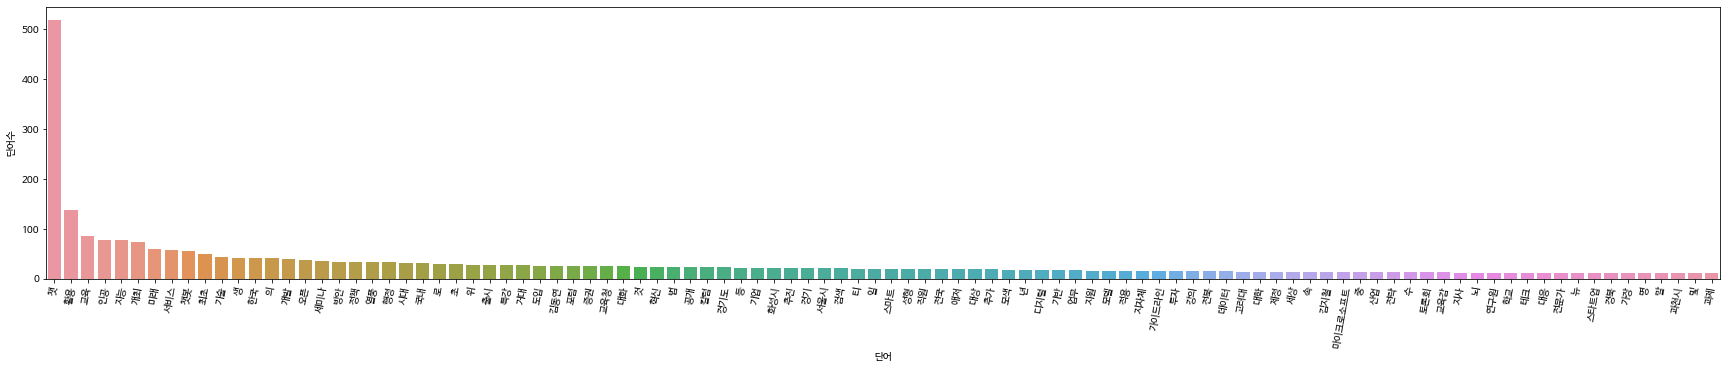

In [70]:
plt.figure(figsize=(30,5))
sns.barplot(data=sm_token_count_30_df,x='단어',y='단어수')
plt.xticks(rotation=80)
plt.show()

In [71]:
from wordcloud import WordCloud
from PIL import Image

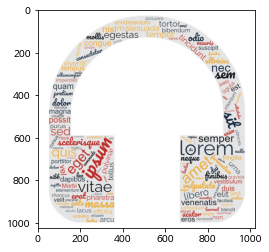

In [72]:
img = Image.open('/content/wordcloud.jpg').convert("RGBA")
plt.imshow(img)

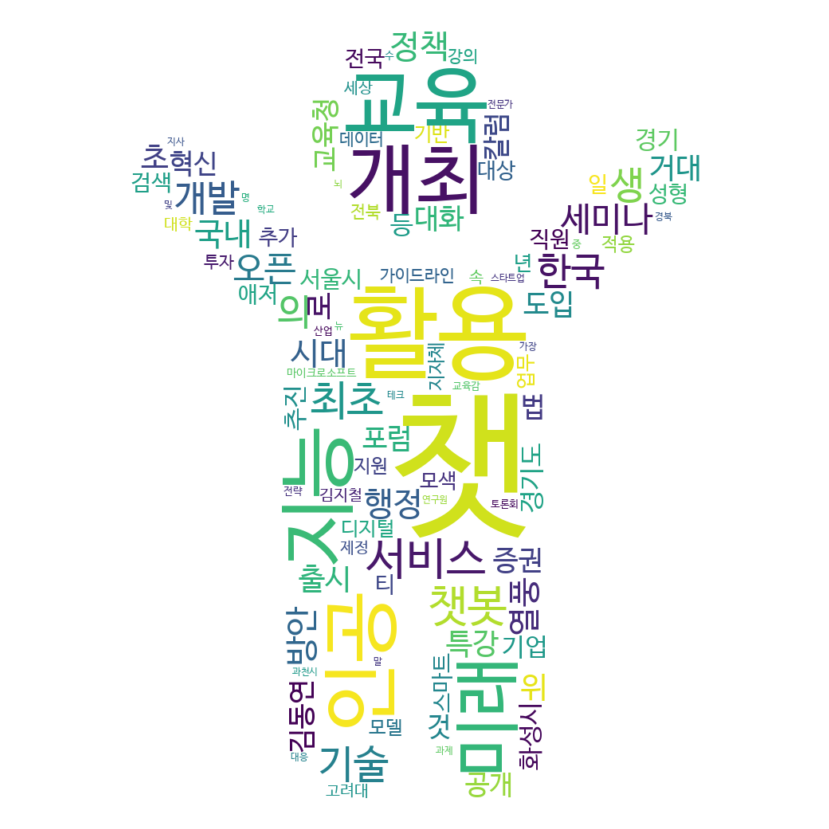

In [74]:
img = Image.open('/content/wordcloud_human.jpg').convert("RGBA")
sm_2022_token_count_30_dic=dict(sm_token_count_30)
plt.figure(figsize=(15,15))
wc=WordCloud(
    background_color='white',
    width=1000,height=600,
    font_path='NanumBarunGothic',
    mask=np.array(img)
    )
cloud=wc.generate_from_frequencies(sm_2022_token_count_30_dic)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()